# Sports Celebrity Image Classification

##  Data Cleaning

In [252]:
import numpy as np
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [274]:
img = cv2.imread("Downloads/Harmanpreet_Kaur/005d8-16288735853495-800.jpg")
img.shape

(999, 800, 3)

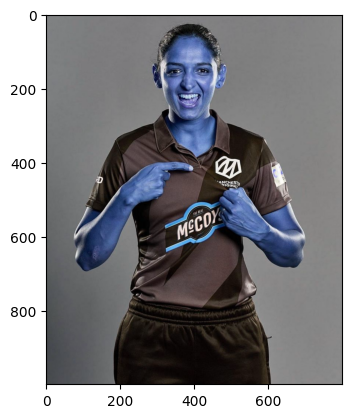

In [275]:
plt.imshow(img)

In [255]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(999, 800)

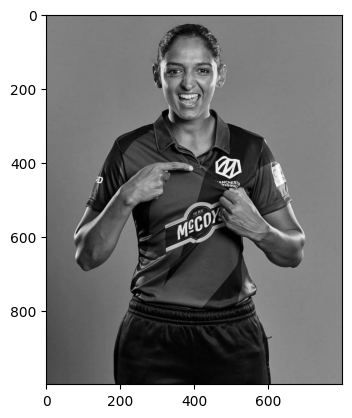

In [256]:
plt.imshow(gray, cmap='gray')

## Preprocessing: Detect face and eyes

In [257]:
face_cascade = cv2.CascadeClassifier("Documents/data/Sports-Celebrity-Face-Recognition/opencv/haarcascades/haarcascade_frontalface_default (1).xml")
eye_cascade = cv2.CascadeClassifier("Documents/data/Sports-Celebrity-Face-Recognition/opencv/haarcascades/haarcascade_eye.xml")

(x,y,w,h) = faces[0]
x,y,w,h

(298, 84, 175, 175)

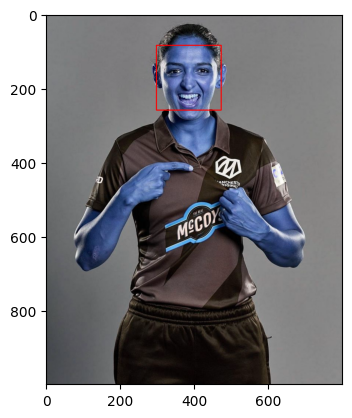

In [258]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

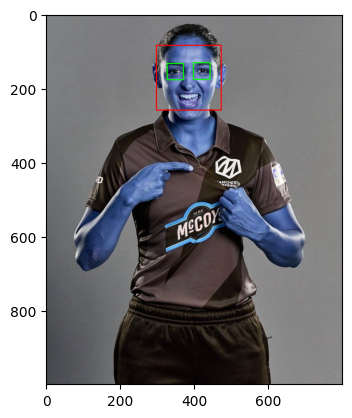

In [259]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

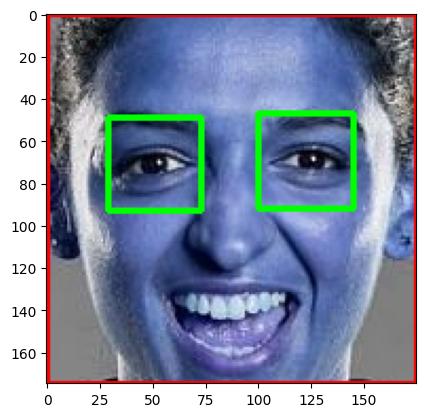

In [260]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [261]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to load image at path:", image_path)
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


In [262]:
path_to_data = "Documents/data/Sports-Celebrity-Face-Recognition/model/dataset/"
path_to_cr_data = "Documents/data/Sports-Celebrity-Face-Recognition/model/dataset/Cropped/"

In [263]:
img_dirs

['C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Harmanpreet_Kaur',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\maria_sharapova',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Neeraj_Chopra',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\pv_sindhu',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\virat_kohli']

In [269]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dir_path = entry.path
        print("Processing images in:", img_dir_path)
        count = 1

        # Extract celebrity name from directory path
        celebrity_name = os.path.basename(img_dir_path)

        # Create cropped folder if it doesn't exist
        cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
        if not os.path.exists(cropped_folder):
            os.makedirs(cropped_folder)

        # Iterate through images in the current directory
        for img_entry in os.scandir(img_dir_path):
            if img_entry.is_file():
                img_path = img_entry.path
                cropped_img = get_cropped_image_if_2_eyes(img_path)
                if cropped_img is not None:
                    # Save cropped image
                    cropped_file_name = f"{celebrity_name}_{count}.png"
                    cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                    cv2.imwrite(cropped_file_path, cropped_img)
                    print("Cropped image saved as:", cropped_file_path)
                    count += 1

        # Add the cropped folder to cropped_image_dirs list
        cropped_image_dirs.append(cropped_folder)

        # Add cropped file paths to celebrity_file_names_dict
        celebrity_file_names_dict[celebrity_name] = [
            os.path.join(cropped_folder, f"{celebrity_name}_{i}.png")
            for i in range(1, count)
        ]


Processing images in: Documents/data/Sports-Celebrity-Face-Recognition/model/dataset/Cropped


## Preprocessing: Use wavelet transform as a feature for traning our model

In [247]:
def w2d(img, mode='haar', level=1):
    # Check if the input image is valid
    if img is None:
        print("Error: Input image is empty or invalid.")
        return None
    
    imArray = img
    
    # Convert to grayscale if the input image is in color
    if len(imArray.shape) > 2 and imArray.shape[2] > 1:
        imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # Convert to float and normalize
    imArray = np.float32(imArray) / 255.0
    
    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process Coefficients
    coeffs_H = list(coeffs)  
    coeffs_H[0] *= 0  

    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    # Print shape and data type of imArray_H
    print("imArray_H shape:", imArray_H.shape)
    print("imArray_H dtype:", imArray_H.dtype)
    
    return imArray_H


imArray_H shape: (1000, 800)
imArray_H dtype: uint8


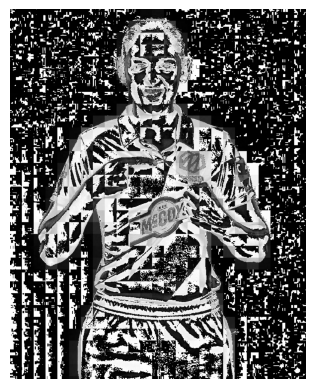

In [248]:
import matplotlib.pyplot as plt
import cv2

image_path = "Documents/data/Sports-Celebrity-Face-Recognition/model/dataset/Harmanpreet_Kaur/005d8-16288735853495-800.jpg"
img = cv2.imread(image_path)

# Call the w2d function
im_har = w2d(img, 'db1', 5)

# Display the resulting image
plt.imshow(im_har, cmap='gray')
plt.axis('off')  # Remove axis
plt.show()


In [249]:
img_dirs

['C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Harmanpreet_Kaur',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\maria_sharapova',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Neeraj_Chopra',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\pv_sindhu',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\virat_kohli']

In [250]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [251]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{}

{'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\cropped': 0,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\Harmanpreet_Kaur': 1,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\maria_sharapova': 2,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\Neeraj_Chopra': 3,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\pv_sindhu': 4,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\virat_kohli': 5}

## Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [158]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

imArray_H shape: (176, 176)
imArray_H dtype: uint8
imArray_H shape: (216, 216)
imArray_H dtype: uint8
imArray_H shape: (860, 860)
imArray_H dtype: uint8
imArray_H shape: (552, 552)
imArray_H dtype: uint8
imArray_H shape: (138, 138)
imArray_H dtype: uint8
imArray_H shape: (340, 340)
imArray_H dtype: uint8
imArray_H shape: (104, 104)
imArray_H dtype: uint8
imArray_H shape: (298, 298)
imArray_H dtype: uint8
imArray_H shape: (394, 394)
imArray_H dtype: uint8
imArray_H shape: (354, 354)
imArray_H dtype: uint8
imArray_H shape: (124, 124)
imArray_H dtype: uint8
imArray_H shape: (1012, 1012)
imArray_H dtype: uint8
imArray_H shape: (142, 142)
imArray_H dtype: uint8
imArray_H shape: (332, 332)
imArray_H dtype: uint8
imArray_H shape: (232, 232)
imArray_H dtype: uint8
imArray_H shape: (452, 452)
imArray_H dtype: uint8
imArray_H shape: (122, 122)
imArray_H dtype: uint8
imArray_H shape: (94, 94)
imArray_H dtype: uint8
imArray_H shape: (226, 226)
imArray_H dtype: uint8
imArray_H shape: (166, 166)
imA

In [159]:
len(X[0])

4096

In [160]:
X[0]

array([[127],
       [126],
       [128],
       ...,
       [160],
       [  0],
       [  0]], dtype=uint8)

In [161]:
y[0]

1

In [162]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(355, 4096)

## Train the model


We will use SVM with rbf kernel tuned with heuristic finetuning

In [163]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8876404494382022

In [165]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           2       0.95      0.87      0.91        23
           3       0.86      0.92      0.89        13
           4       0.76      0.84      0.80        19
           5       0.96      1.00      0.98        22

    accuracy                           0.89        89
   macro avg       0.89      0.88      0.88        89
weighted avg       0.89      0.89      0.89        89



##  Using GridSearch

In [166]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [167]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [168]:

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.834871,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.759189,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.891055,{'logisticregression__C': 1}


In [169]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [170]:
best_estimators['svm'].score(X_test,y_test)

0.9438202247191011

In [171]:
best_estimators['random_forest'].score(X_test,y_test)

0.8426966292134831

In [172]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9213483146067416

In [173]:
best_clf = best_estimators['logistic_regression']

In [174]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  1,  0,  1],
       [ 0, 21,  1,  1,  0],
       [ 0,  0, 13,  0,  0],
       [ 1,  0,  1, 17,  0],
       [ 0,  0,  1,  0, 21]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

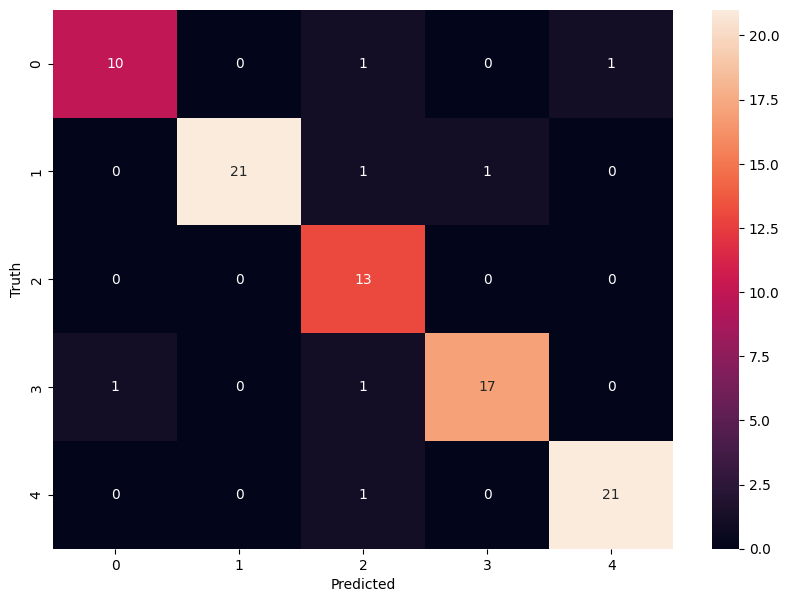

In [175]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [177]:
class_dict

{'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\cropped': 0,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\Harmanpreet_Kaur': 1,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\maria_sharapova': 2,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\Neeraj_Chopra': 3,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\pv_sindhu': 4,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\virat_kohli': 5}

In [178]:
import os
import shutil

# List of directories
img_dirs = [
    'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped',
    'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Harmanpreet_Kaur',
    'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\maria_sharapova',
    'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Neeraj_Chopra',
    'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\pv_sindhu',
    'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\virat_kohli'
]

# Directory to be removed
dir_to_remove = 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped'

# Remove the directory from the list
if dir_to_remove in img_dirs:
    img_dirs.remove(dir_to_remove)

print("Updated img_dirs:", img_dirs)

Updated img_dirs: ['C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Harmanpreet_Kaur', 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\maria_sharapova', 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Neeraj_Chopra', 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\pv_sindhu', 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\virat_kohli']


In [186]:
class_dict = img_dirs
class_dict

['C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Harmanpreet_Kaur',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\maria_sharapova',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\Neeraj_Chopra',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\pv_sindhu',
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\virat_kohli']

In [187]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\cropped': 0,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\Harmanpreet_Kaur': 1,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\maria_sharapova': 2,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\Neeraj_Chopra': 3,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\pv_sindhu': 4,
 'C:\\Users\\Anshika-Chauhan\\Documents\\data\\Sports-Person-Classifier\\model\\dataset\\cropped\\virat_kohli': 5}

## Save the trained model

In [182]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

## Save class dictionary

In [183]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))